In [1]:
# Import libraries
import numpy as np                   
import pandas as pd                  
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
# Load the dataset
df = pd.read_csv('./penguins.csv')
df = df.dropna(subset=['sex'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [8]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [17]:
# define X and y variables for modelling
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
encoder = LabelEncoder()
df['encoded_species'] = encoder.fit_transform(df['species'])

df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,encoded_species
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,0


In [14]:
df['encoded_species'].unique()

array([0, 1, 2])

In [15]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'encoded_species'],
      dtype='object')

In [24]:
# define x and y labels for model build
X = df[['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g']].values
y = df['encoded_species'].values

In [26]:
# apply MinMaxScaler to scale the data
scaler = MinMaxScaler()

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# print the shape of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (266, 4)
X_test shape: (67, 4)


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# define the model
model = Sequential()
model.add(Dense(64, activation='relu')) #input layer
# model.add(Dropout(0.2)) # dropout layer
model.add(Dense(64, activation='relu')) # hidden layer
# model.add(Dropout(0.2)) # dropout layer
# model.add(Dense(64, activation='relu')) # hidden layer
# model.add(Dropout(0.2)) # dropout layer
# model.add(Dense(64, activation='relu')) # hidden layer
model.add(Dense(3, activation='softmax'))# output layer - 3 classes of penguin species

# compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    restore_best_weights = True
)

# fit the model
history = model.fit(X_train, 
                    y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_test, y_test),
                    verbose=1,
                    callbacks =[early_stopping])


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.4267 - loss: 1.0402 - val_accuracy: 0.7463 - val_loss: 0.9845
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7517 - loss: 0.9654 - val_accuracy: 0.7910 - val_loss: 0.9115
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7977 - loss: 0.8850 - val_accuracy: 0.7910 - val_loss: 0.8325
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7924 - loss: 0.8131 - val_accuracy: 0.7910 - val_loss: 0.7511
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7918 - loss: 0.7317 - val_accuracy: 0.8060 - val_loss: 0.6669
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7699 - loss: 0.6636 - val_accuracy: 0.8209 - val_loss: 0.5856
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8082 - loss: 0.5648 - val_accuracy: 0.8209 - val_loss: 0.5113
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7638 - loss: 0.5207 - val_accuracy: 0.8358 - val_loss:

In [49]:
# make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# y_pred_classes

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000018D34ECB9C0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


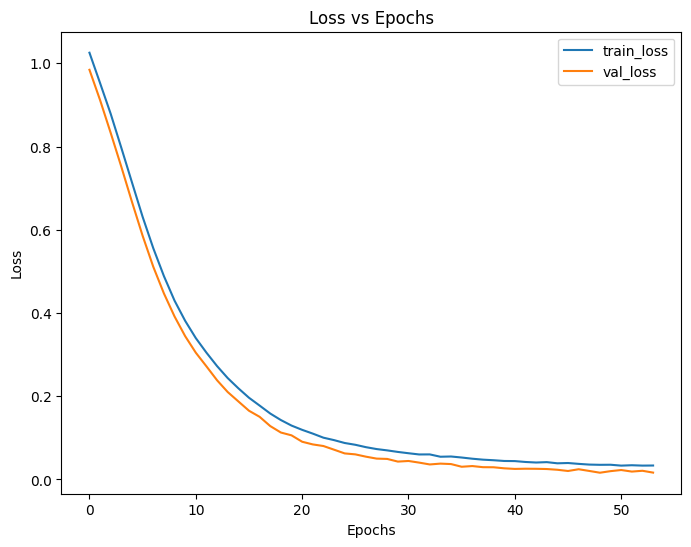

In [50]:
loss = pd.DataFrame(history.history)
loss.head()

# plot loss agains epoch
plt.figure(figsize=(8, 6))
plt.plot(loss['loss'], label= 'train_loss')
plt.plot(loss['val_loss'], label= 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

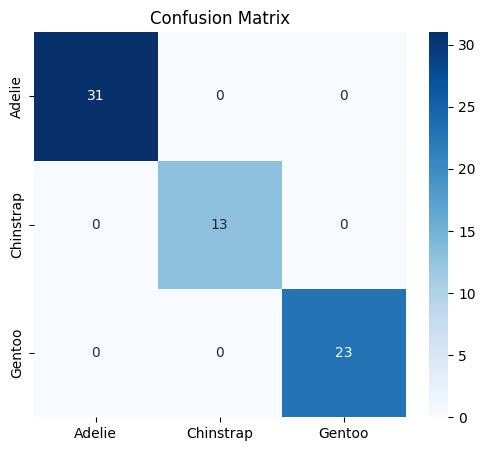

In [51]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.show()